In [1]:
from minimizer_langchain import PromptMinimizerLangChain
import matplotlib.pyplot as plt

c:\Users\kevin\UIUC\546-prompt-minimization\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [35]:
class Config:
        ollama = True  
        model = 'TinyLlama/TinyLlama-1.1B-Chat-v1.0'
        temperature = 0.0
        bert_score_weight = 0.5
        compression_weight = 0.5
        num_iterations = 6
        max_token_length = 1000
    
# Test input
original_prompt = "Explain the process of photosynthesis in simple terms for a 10th grade science class."
#original_output = "Photosynthesis is the process plants use to convert sunlight into energy. They take in carbon dioxide and water, and with the help of sunlight, they produce glucose and oxygen."

#history = iterative_minimization(test, steps=3)
prompt_minimizer = PromptMinimizerLangChain(Config())

# Run LLM to get output for original prompt
generated_output = prompt_minimizer.llm.invoke(original_prompt).content
print("generated Output:", generated_output)

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


generated Output:  Title: Photosynthesis: The Magic Behind Green Plants

Hello, future scientists! Today, we're going to dive into one of the most fascinating processes on Earth – photosynthesis. Let's get started!

Photosynthesis is a magical process that allows plants, algae, and some bacteria to convert sunlight, water, carbon dioxide, and nutrients into food (glucose) and oxygen. Here's a simplified breakdown of how it works:

1. **Light-dependent reactions**: This is the first part of photosynthesis that takes place in structures called chloroplasts within plant cells. The light energy from the sun is absorbed by a green pigment called chlorophyll, which is found in leaves. This energy is then used to split water molecules (H2O) into hydrogen ions (protons), oxygen gas (O2), and high-energy electrons.

2. **Light-independent reactions**: Also known as the Calvin cycle, this process occurs in the stroma of the chloroplasts. The oxygen gas produced during light-dependent reactions i

In [36]:
# run minimization
history = prompt_minimizer(original_prompt, generated_output)


--- Step 1 ---
Current prompt:  Explain the process of photosynthesis in simple terms for a 10th grade science class.
Proposed prompt:  Describe photosynthesis's basic steps for high school students.
Compression Score: 0.7529411764705882
BERT Score: 0.9034188985824585
Score: 0.42476113894406486

--- Step 2 ---
Current prompt:   Describe photosynthesis's basic steps for high school students.
Proposed prompt:  Explain the key stages of photosynthesis for high schoolers.
Compression Score: 0.7176470588235294
BERT Score: 0.84549880027771
Score: 0.4360741292729097

--- Step 3 ---
Current prompt:   Explain the key stages of photosynthesis for high schoolers.
Proposed prompt:  Describe the main steps of photosynthesis for teens.
Compression Score: 0.6235294117647059
BERT Score: 0.8836658000946045
Score: 0.3699318058350507

--- Step 4 ---
Current prompt:   Describe the main steps of photosynthesis for teens.
Proposed prompt:  Explain basic photosynthesis steps for teens.
Compression Score: 0.

6


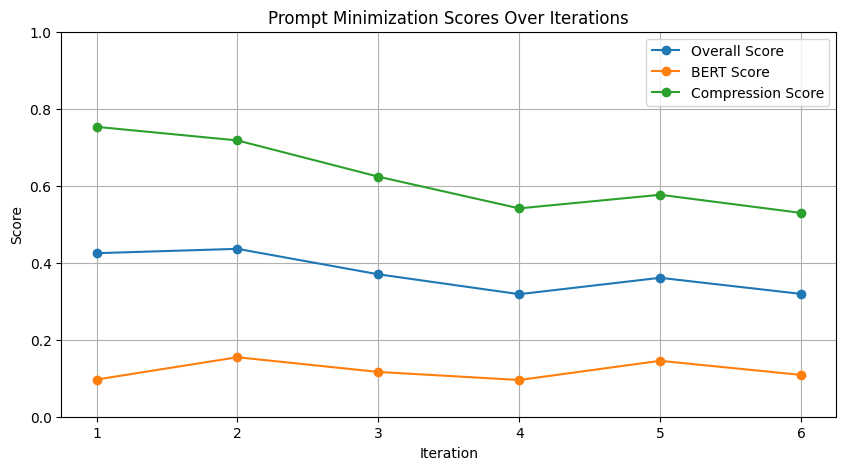

In [37]:
scores = [step['score'] for step in history]
bert_scores = [1 - step['bert_score'] for step in history]
compression_scores = [step['compression_score'] for step in history]
print(len(scores))
plt.figure(figsize=(10, 5))
plt.plot(scores, label='Overall Score', marker='o')
plt.plot(bert_scores, label='BERT Score', marker='o')
plt.plot(compression_scores, label='Compression Score', marker='o')
plt.xlabel('Iteration')
plt.xticks(range(len(scores)), range(1, len(scores) + 1))
plt.ylabel('Score')
plt.ylim(0, 1)
plt.title('Prompt Minimization Scores Over Iterations')
plt.legend()
plt.grid(True)
plt.show()



In [38]:
outputs = [step['new_output'] for step in history]
print("Original Output:", generated_output)
print("\n")
for i, output in enumerate(outputs):
    print(f"Output after iteration {i+1}: \n\n{output} \n\n")

Original Output:  Title: Photosynthesis: The Magic Behind Green Plants

Hello, future scientists! Today, we're going to dive into one of the most fascinating processes on Earth – photosynthesis. Let's get started!

Photosynthesis is a magical process that allows plants, algae, and some bacteria to convert sunlight, water, carbon dioxide, and nutrients into food (glucose) and oxygen. Here's a simplified breakdown of how it works:

1. **Light-dependent reactions**: This is the first part of photosynthesis that takes place in structures called chloroplasts within plant cells. The light energy from the sun is absorbed by a green pigment called chlorophyll, which is found in leaves. This energy is then used to split water molecules (H2O) into hydrogen ions (protons), oxygen gas (O2), and high-energy electrons.

2. **Light-independent reactions**: Also known as the Calvin cycle, this process occurs in the stroma of the chloroplasts. The oxygen gas produced during light-dependent reactions is